<a href="https://colab.research.google.com/github/Ashwal-B-S/PlantDiseaseDetection/blob/main/Main_Classifier_Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Getting Dataset

In [1]:
!git clone https://github.com/deepakHonakeri05/yolo_dataset.git

Cloning into 'yolo_dataset'...
remote: Enumerating objects: 36553, done.
remote: Total 36553 (delta 0), reused 0 (delta 0), pack-reused 36553
Receiving objects: 100% (36553/36553), 632.83 MiB | 28.52 MiB/s, done.
Resolving deltas: 100% (221/221), done.
Checking out files: 100% (72348/72348), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

import cv2

import os

import numpy as np
from keras.preprocessing import image

In [4]:
# MAIN CLASSIFIER

NUM_CLASSES = 8

RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']


model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet'))


# model.add(Dense(1024, activation = DENSE_LAYER_ACTIVATION))
# 2nd layer as Dense for 8-class classification
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False

#compiling
model.compile(optimizer = 'adam', loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)

# model.load_weights('./peach.h5')


94773248/94765736 [==============================] - 1s 0us/step


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 8)                 16392     
Total params: 23,604,104
Trainable params: 16,392
Non-trainable params: 23,587,712
_________________________________________________________________


In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range = 270,
    brightness_range = (-2,2),
        shear_range=0.2,
        zoom_range=0.3,
    vertical_flip=True,
    validation_split=0.3,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(vertical_flip=True,
                                 horizontal_flip=True,
                                 rotation_range=180,
                                 zoom_range=0.2)

val_datagen = ImageDataGenerator(vertical_flip=True,
                                 horizontal_flip=True,
                                 rotation_range=180,
                                 zoom_range=0.2)

train_set = train_datagen.flow_from_directory(
        'yolo_dataset/Dataset/train/',
        target_size=(224,224),
        batch_size=64,
        seed=101, 
        shuffle=True,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'yolo_dataset/Dataset/test/',
        target_size=(224, 224),
        batch_size=64,
        shuffle=True,
        seed=101,
        class_mode='categorical')

# val_set = val_datagen.flow_from_directory(
#         'yolo_dataset/pepper/val/',
#         target_size=(224, 224),
#         batch_size=64,
#         shuffle=True,
#         seed=101,
#         class_mode='categorical')

history = model.fit_generator(
        train_set,
        epochs=10,
        validation_data=test_set,
        validation_steps=113)


model.save_weights("/content/drive/My Drive/Leaf_Weights/Weights/MainClassifier.h5")

Found 28938 images belonging to 8 classes.
Found 7210 images belonging to 8 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
453/453 [==============================] - 4401s 10s/step - loss: 1.0809 - accuracy: 0.6714 - val_loss: 0.2108 - val_accuracy: 0.9379
Epoch 2/10
453/453 [==============================] - 4392s 10s/step - loss: 0.9390 - accuracy: 0.7152 - val_loss: 0.1282 - val_accuracy: 0.9612
Epoch 3/10
453/453 [==============================] - 4369s 10s/step - loss: 0.9323 - accuracy: 0.7164 - val_loss: 0.1105 - val_accuracy: 0.9653
Epoch 4/10
453/453 [==============================] - 4351s 10s/step - loss: 0.9120 - accuracy: 0.7245 - val_loss: 0.0802 - val_accuracy: 0.9778
Epoch 5/10
453/453 [==============================] - 4356s 10s/step - loss: 0.9109 - accuracy: 0.7252 - val_loss: 0.0842 - val_accuracy: 0.9750
Epoch 6/10
453/453 [==============================] - 4345s 10s/step - loss: 0.9125 - accuracy: 0.7242 - val_loss: 0.0925 - val_accuracy: 0.9706
Epoch 7/10
453/453 [==============================] - 4333s 10s/step - loss: 0.9073 - accuracy: 0.7247 - val_loss: 0.0730 - val_ac

In [7]:
scores = model.evaluate_generator(generator=test_set)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


accuracy: 97.30%


In [8]:
scores

[0.08317120373249054, 0.9729542136192322]

In [9]:
model.metrics_names

['loss', 'accuracy']

In [10]:
history.history

{'accuracy': [0.6714354753494263,
  0.715184211730957,
  0.7163936495780945,
  0.7245144844055176,
  0.725240170955658,
  0.7242380380630493,
  0.7246527075767517,
  0.7305273413658142,
  0.7308037877082825,
  0.7295942902565002],
 'loss': [1.080870509147644,
  0.9390035271644592,
  0.9322614073753357,
  0.9120197892189026,
  0.9109252691268921,
  0.9125229716300964,
  0.9073488116264343,
  0.8930007219314575,
  0.8892465233802795,
  0.8954838514328003],
 'val_accuracy': [0.9378640651702881,
  0.9611650705337524,
  0.9653259515762329,
  0.9778085947036743,
  0.9750346541404724,
  0.9705963730812073,
  0.9782246947288513,
  0.9758668541908264,
  0.9791955351829529,
  0.9754507541656494],
 'val_loss': [0.2108069658279419,
  0.12821564078330994,
  0.11052502691745758,
  0.08022870868444443,
  0.08420999348163605,
  0.09252779185771942,
  0.07304954528808594,
  0.07176275551319122,
  0.0665307492017746,
  0.0778392031788826]}

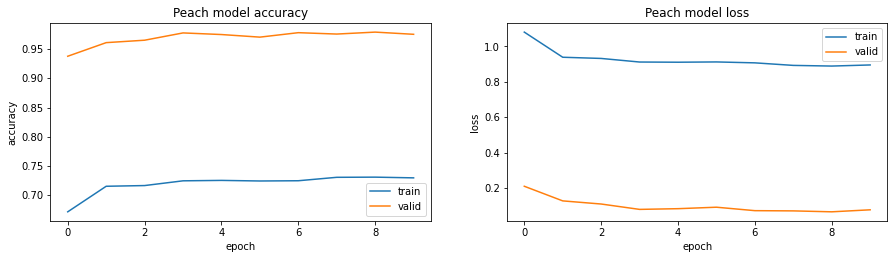

In [11]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('Peach model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('Peach model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [12]:
thresh = 0.60
test_image = image.load_img('yolo_dataset/Dataset/train/Tomato/tomato_13317.JPG',target_size=(224,224))  
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)

train_set.class_indices
if result[0][0] >= thresh:
     prediction = 'Apple'
elif result[0][1] >= thresh :
        prediction = 'Cherry'
elif result[0][2] >= thresh :
        prediction = 'Grape'
elif result[0][3] >= thresh :
        prediction = 'Peach'    
elif result[0][4] >= thresh :
        prediction = 'Pepper'
elif result[0][5] >= thresh :
        prediction = 'Potato'  
elif result[0][6] >= thresh :
        prediction = 'Strawberry'  
else:
        prediction = 'Tomato'       


print(result)
print(prediction)
print(max(max(result)))
print(min(min(result)))

[[2.0709271e-03 1.3231557e-08 3.0962797e-04 2.8118081e-04 3.2290354e-05
  2.5637462e-07 1.4172166e-04 9.9716407e-01]]
Tomato
0.9971641
1.3231557e-08


In [13]:
thresh = 0.60
test_image = image.load_img('yolo_dataset/Dataset/train/Apple/apple_16.JPG',target_size=(224,224))  
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)

train_set.class_indices
if result[0][0] >= thresh:
     prediction = 'Apple'
elif result[0][1] >= thresh :
        prediction = 'Cherry'
elif result[0][2] >= thresh :
        prediction = 'Grape'
elif result[0][3] >= thresh :
        prediction = 'Peach'    
elif result[0][4] >= thresh :
        prediction = 'Pepper'
elif result[0][5] >= thresh :
        prediction = 'Potato'  
elif result[0][6] >= thresh :
        prediction = 'Strawberry'  
else:
        prediction = 'Tomato'       


print(result)
print(prediction)
print(max(max(result)))
print(min(min(result)))

[[9.7509313e-01 7.4262214e-05 5.8602513e-08 8.1155762e-05 2.4745954e-02
  1.0330832e-07 1.8195291e-08 5.3382632e-06]]
Apple
0.9750931
1.819529e-08


In [14]:
thresh = 0.60
test_image = image.load_img('yolo_dataset/Dataset/test/Pepper/pepper_1040.JPG',target_size=(224,224))  
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)

train_set.class_indices
if result[0][0] >= thresh:
     prediction = 'Apple'
elif result[0][1] >= thresh :
        prediction = 'Cherry'
elif result[0][2] >= thresh :
        prediction = 'Grape'
elif result[0][3] >= thresh :
        prediction = 'Peach'    
elif result[0][4] >= thresh :
        prediction = 'Pepper'
elif result[0][5] >= thresh :
        prediction = 'Potato'  
elif result[0][6] >= thresh :
        prediction = 'Strawberry'  
else:
        prediction = 'Tomato'       


print(result)
print(prediction)
print(max(max(result)))
print(min(min(result)))

[[1.1372506e-07 3.4425791e-06 1.4057072e-08 3.7012345e-05 9.9995697e-01
  3.5421063e-08 2.3618046e-10 2.4337344e-06]]
Pepper
0.99995697
2.3618046e-10
